# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 7


### Zadanie 1

Z miasta A do miasta B kierowca przejechał ze średnią szybkością 60 km/h. Z powrotem jechał szybciej, ze średnią 80 km/h. Jaka była jego średnia szybkość na całej trasie? 

**Uwaga:** nie używaj gotowych implementacji.

> Wskazówka: średnia harmoniczna.

In [1]:
import numpy as np

In [2]:
v1 = 60
v2 = 80
v = 2 / (1/v1 + 1/v2)
print(v)

68.57142857142857


### Zadanie 2

Wyobraźmy sobie miasto o liczbie 700 tys. mieszkańców. W mieście pojawiła się choroba i wiemy, że jedna osoba na 1000 zachorowała. Nie wiemy, które to dokładnie osoby, ale jest dostępny test, którego skuteczność wynosi 99%. Teraz wcielamy się w pacjenta, który przeprowadził test, a wynik testu jest pozytywny. Chcemy dowiedzieć się, jakie jest prawdopodobieństwo, że zachorowaliśmy.

#### A)

Przeprowadzić symulację komputerową: (Nie trzeba się ściśle trzymać wskazówek)

- Generujemy listę wielkości 700 tys.
- Losowo wybieramy 700 tys./1000 (bo jedna na 1000 osob zachorowała) osób i zaznaczamy je jako chore.
- Wybieramy losowo po 1% osob chorych i zdrowych, a następnie zaznaczamy ich diagnoze na nieprawidlowa (bo skutecznosc (rozumień jako czułość) testu wynosi 99%).
- Oblicz jakie jest prawdopodobienstwo ze osoba z pozytywnym wynikiem testu jest faktycznie chora (`liczba osób chorych z wynikiem pozytywnym` / `liczba wszystkich osob z wynikiem pozytywnym`).



In [3]:
def probability_simulation():
    population_count = 700_000
    ill_count = round(population_count / 1_000)
    false_count = round(population_count / 100)

    people = np.zeros((population_count, 2), dtype=np.bool_)
    people[:ill_count, :] = 1

    np.random.shuffle(people)
    people[:false_count, 1] = ~people[:false_count, 1]

    true_posistive_count = np.sum(people[:, 0] & people[:, 1])
    all_positive_count = np.sum(people[:, 1])
    prob = true_posistive_count / all_positive_count
    return prob

probability_simulation()

0.09037711313394019

#### B)

Napisać funkcję, która zwróci wynik obliczony ze wzoru Bayesa. Zmierz i porównaj czas obliczeń w zad. A i zad. B



In [259]:
def probability_formula(sensitivity):
    num = 0.001 * sensitivity
    denom = 0.999 * (1-sensitivity) + 0.001 * sensitivity
    return num / denom

probability_formula(0.99)

0.09016393442622944

In [261]:
from time import time

start = time()
for i in range(10000):
    probability_formula(0.99)
formula_time = (time() - start) / 10000

start = time()
probability_simulation()
simulation_time = time() - start

print(f'Simulation time: {simulation_time} seconds')
print(f'   Formula time: {formula_time} seconds')

Simulation time: 0.5799267292022705 seconds
   Formula time: 3.0057430267333983e-07 seconds


#### C)

Wyświetl wykres, gdzie na osi X znajduje się _czułość testu_ a na osi Y znajduje się _prawdopodobieństwo, że osoba z pozytywnym wynikiem jest chora_.

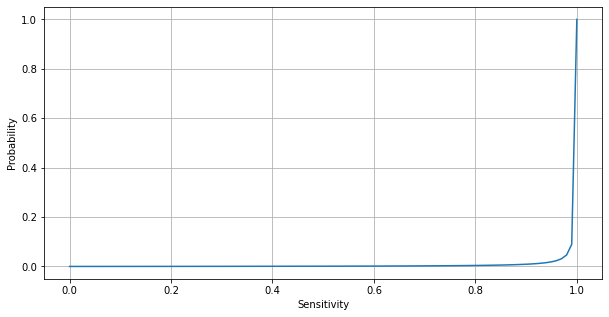

In [262]:
import matplotlib.pyplot as plt

sens = np.linspace(0, 1, 100)
prob = probability_formula(sens)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(sens, prob)
ax.grid()
ax.set_xlabel('Sensitivity')
ax.set_ylabel('Probability');

### Zadanie 3

Sprawdź (symulacją) jak często trafia się "ręka" zawierająca $\ge 8$ kart w jednym kolorze z 13 kart. Czyli losujemy 13 kart z 52 (wiec "ręki" jak w brydzu) tak długo, aż w jakimś kolorze dostaniemy $\ge 8$ kart. Przeprowadź 1000 takich prob i oblicz średnią. Dodatkowo wypisz jedną (np. ostatnią) taką wylosowaną rękę.

In [263]:
from random import sample
from collections import Counter
from itertools import count

def take_cards():
    cards = [c for c in ['Pik', 'Kier', 'Trefl', 'Karo'] for i in range(13)]
    hand = sample(cards, 13)
    most_common_count = Counter(hand).most_common(1)[0][-1]
    return most_common_count >= 8, hand

def get_trials_count():
    last_hand = None
    for counter in count(1):
        success, last_hand = take_cards()
        if success:
            return counter, last_hand

counts = [get_trials_count()[0] for i in range(1000)]
mean_trials = np.mean(counts)
print(f'Every {mean_trials} trials')
print(get_trials_count()[1])

Every 191.028 trials
['Kier', 'Kier', 'Kier', 'Kier', 'Kier', 'Kier', 'Karo', 'Kier', 'Kier', 'Trefl', 'Pik', 'Karo', 'Karo']
